<a href="https://colab.research.google.com/github/Abhitay/Comparing-Machine-Learning-Algorithms-for-Diabetes-Prediction-and-Analysis-using-BRFSS-Survey-Data/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Reading the dataset

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Research Paper/Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

#Cleaning the dataset

##Checking null values

In [ ]:
#Before
diabetes.shape

(253680, 22)

In [ ]:
diabetes.isna().sum()
# No missing values, therfore we don't drop the missing values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

##Checking for Incorrect values

In [ ]:
for i in diabetes:
  print(i)
  print(diabetes[i].value_counts())
  print('---------------------------------')

Diabetes_binary
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
---------------------------------
HighBP
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
---------------------------------
HighChol
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
---------------------------------
CholCheck
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
---------------------------------
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
---------------------------------
Smoker
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
---------------------------------
Stroke
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
---------------------------------
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
---------------------------------
PhysActivity
1.0    191920
0.0     61760
Nam

In [ ]:
# There don't seem to be any incorrect values.

##Checking for duplicate values

In [ ]:
#Before
diabetes.duplicated().sum()

24206

In [ ]:
#After
diabetes.drop_duplicates(inplace=True)
diabetes.duplicated().sum()

0

#Vizualization

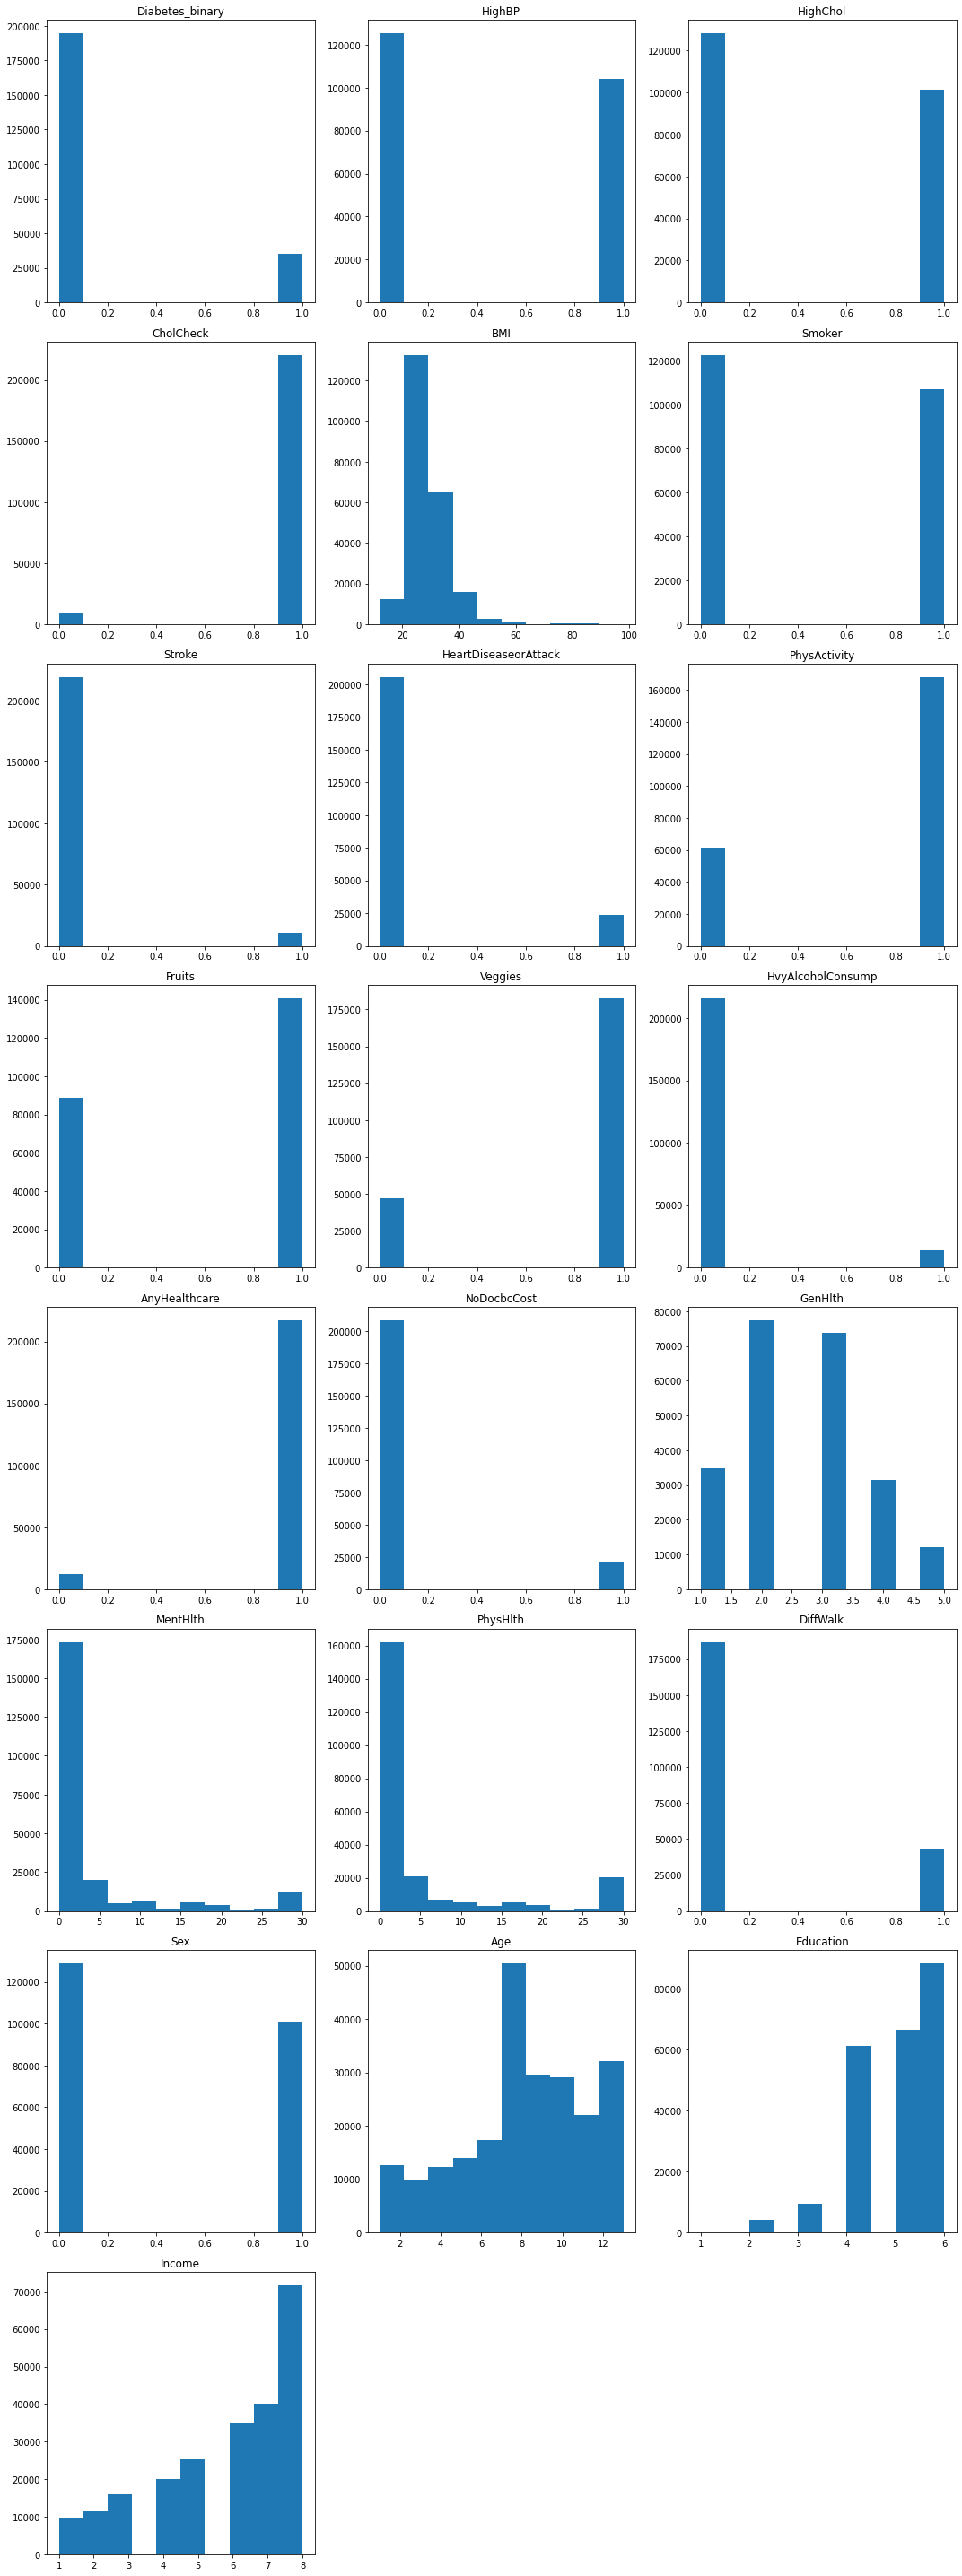

In [ ]:
plt.figure(figsize=(15,40))
diabetesX_col = list(diabetes[1:].columns)
for i in range(len(diabetesX_col)):
  plt.subplot(8,3,i+1)
  plt.title(diabetesX_col[i])
  plt.hist(diabetes[diabetesX_col[i]])
plt.tight_layout()

In [ ]:
#The dataset is skewed toward non diabetes

#Effect of features of prediction

##Correlation

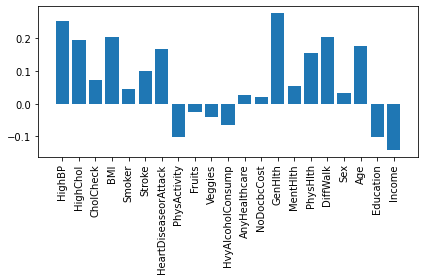

In [ ]:
corrList = list(diabetes.corr()['Diabetes_binary'])
corrList
plt.bar(diabetes.columns[1:],corrList[1:])
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
diabetes.corr()['Diabetes_binary'][1:].sort_values()

Income                 -0.140659
Education              -0.102686
PhysActivity           -0.100404
HvyAlcoholConsump      -0.065950
Veggies                -0.041734
Fruits                 -0.024805
NoDocbcCost             0.020048
AnyHealthcare           0.025331
Sex                     0.032724
Smoker                  0.045504
MentHlth                0.054153
CholCheck               0.072523
Stroke                  0.099193
PhysHlth                0.156211
HeartDiseaseorAttack    0.168213
Age                     0.177263
HighChol                0.194944
BMI                     0.205086
DiffWalk                0.205302
HighBP                  0.254318
GenHlth                 0.276940
Name: Diabetes_binary, dtype: float64

In [ ]:
# The 4 features: Fruits, AnyHealthcare, NoDocbcCost, and Sex are least correlated with the prediction of diabetes.

##Visualisation of features with respect to target variable 

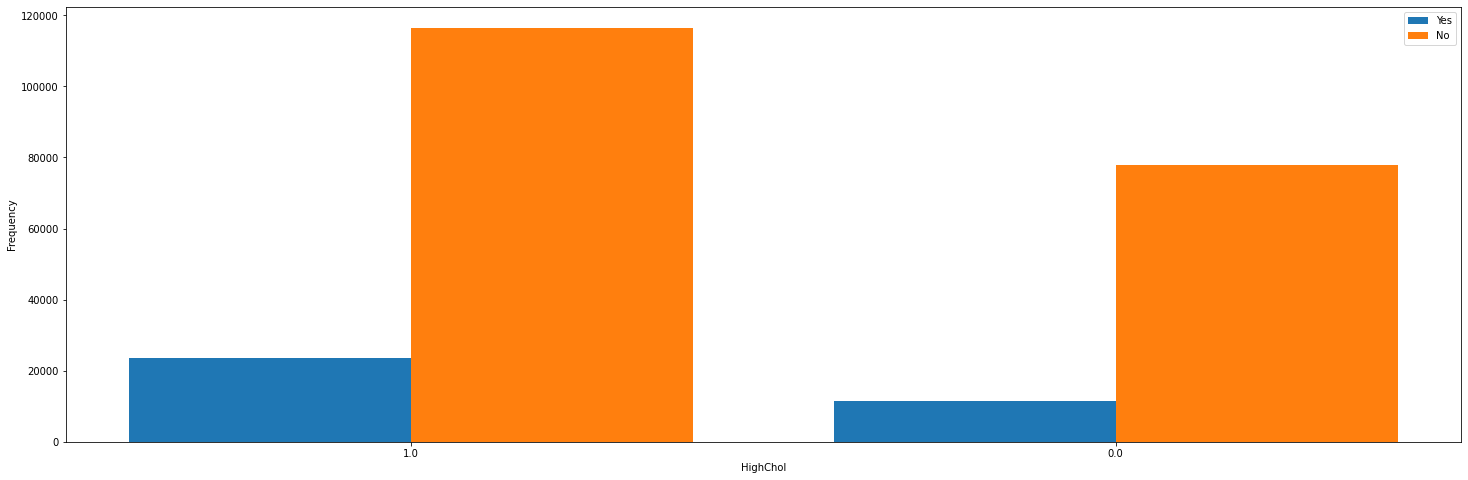

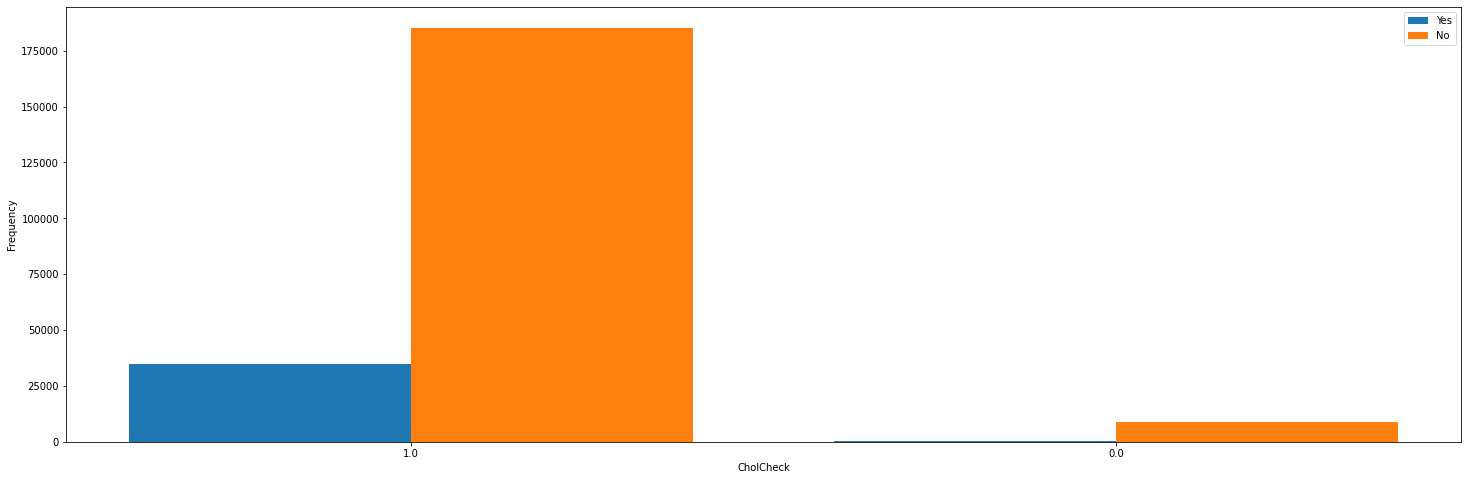

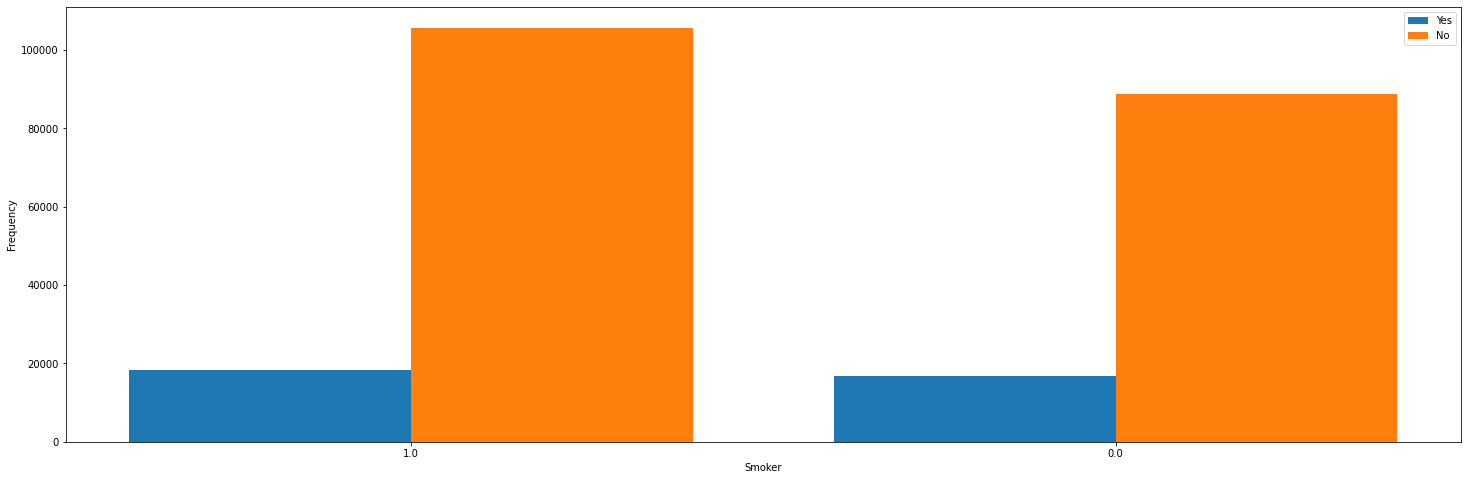

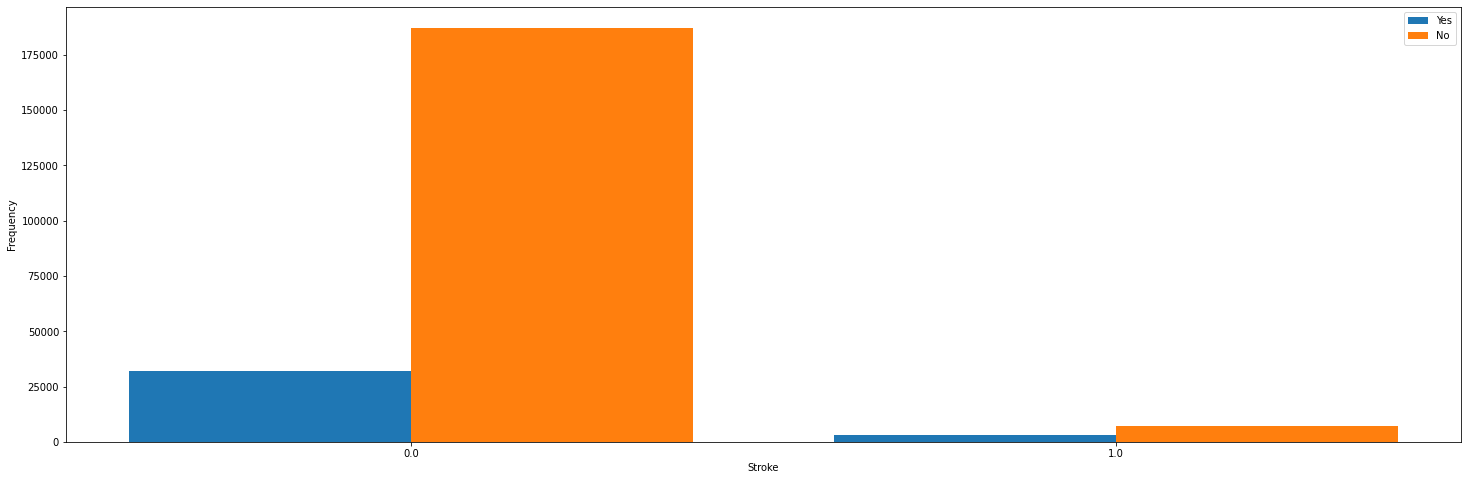

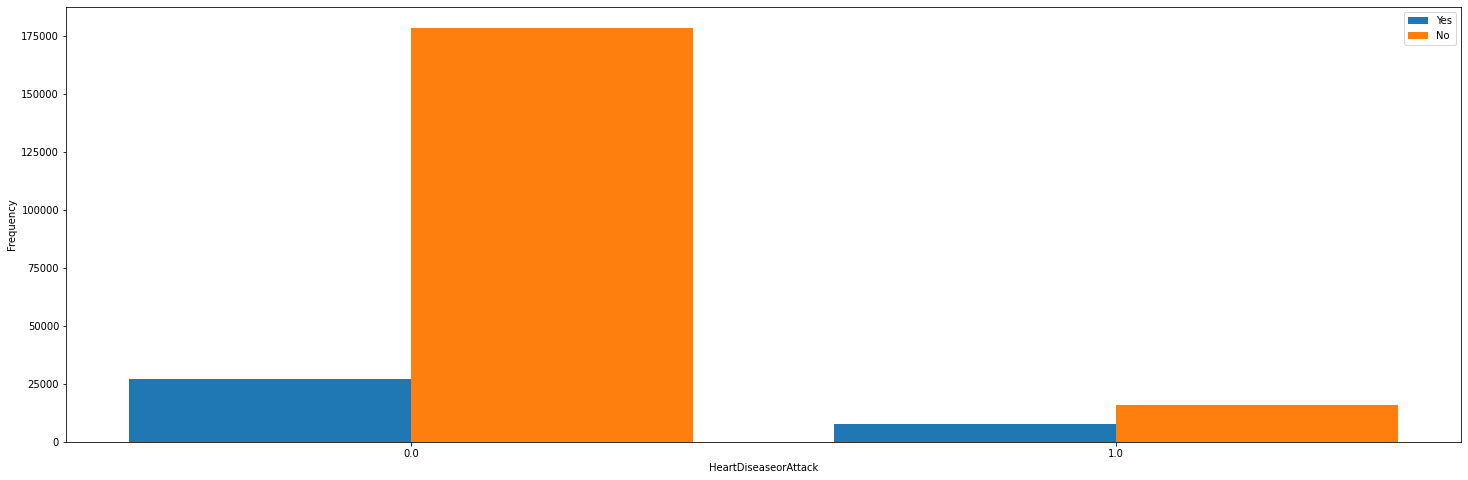

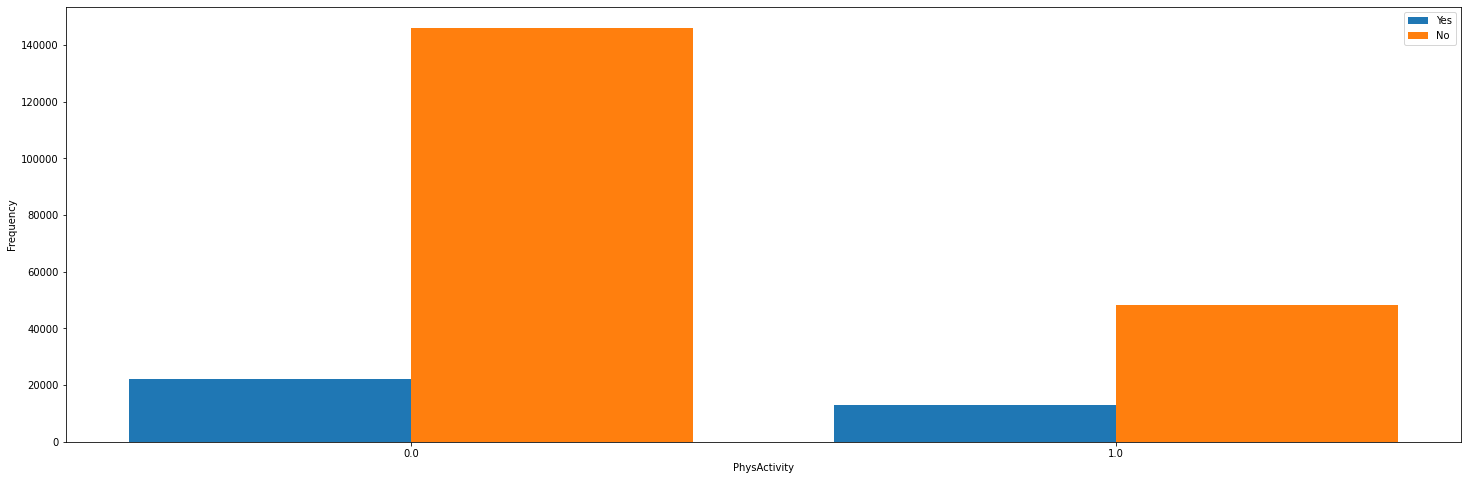

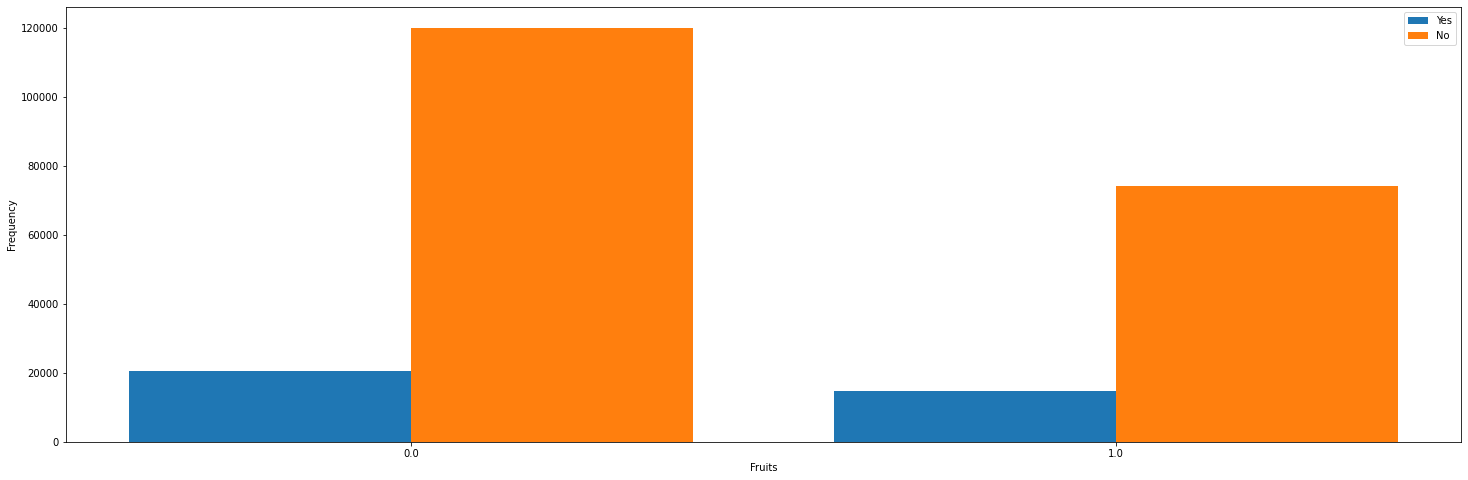

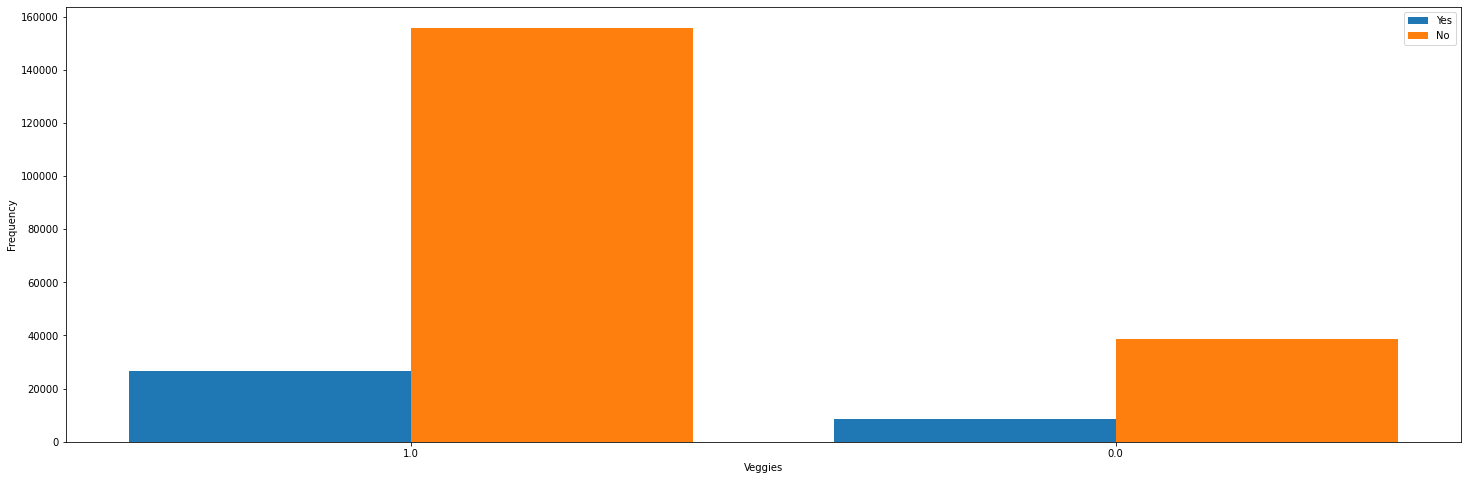

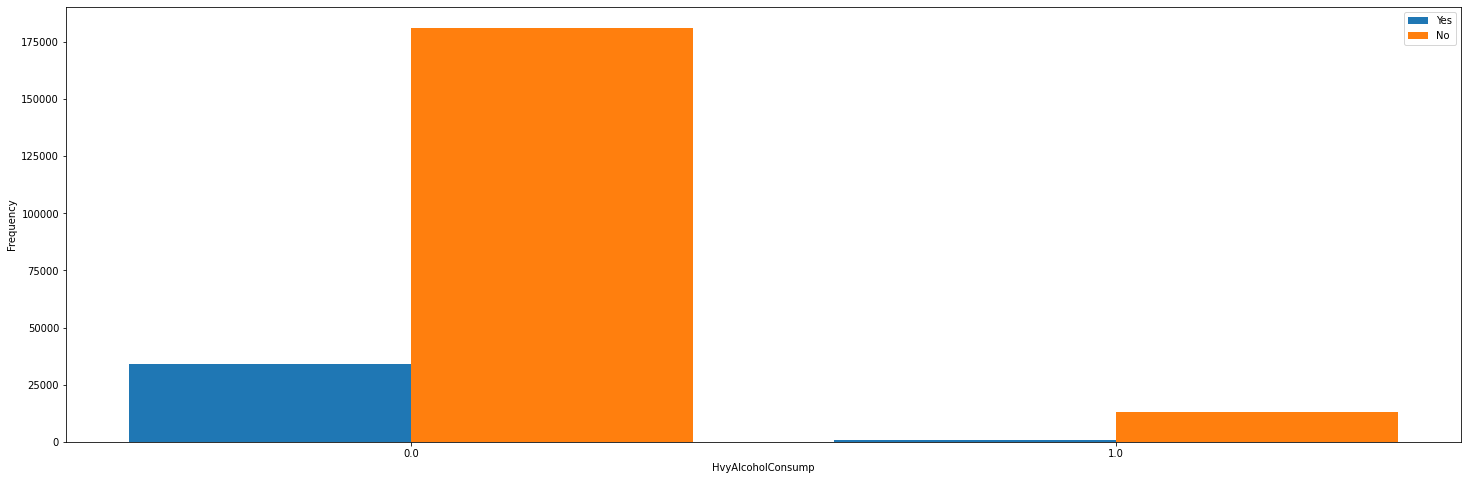

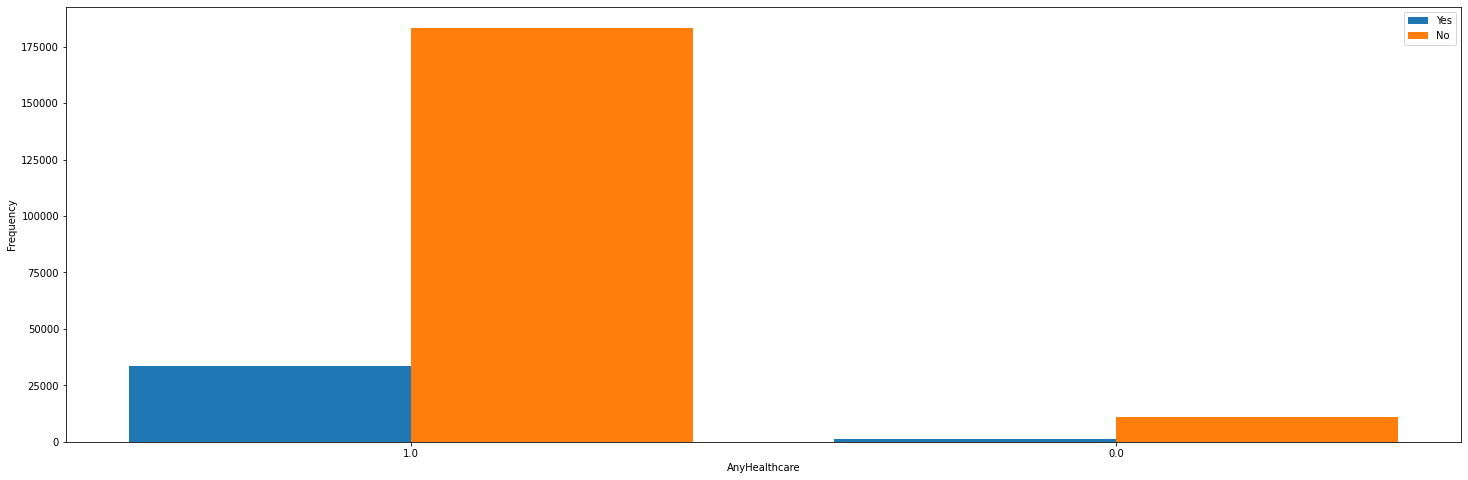

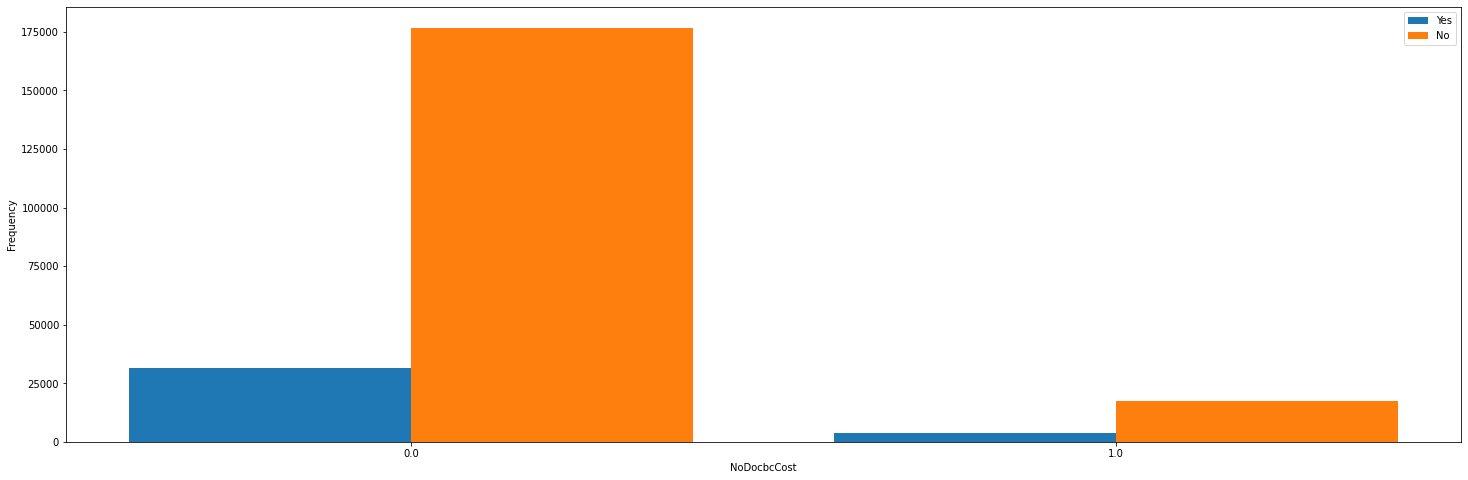

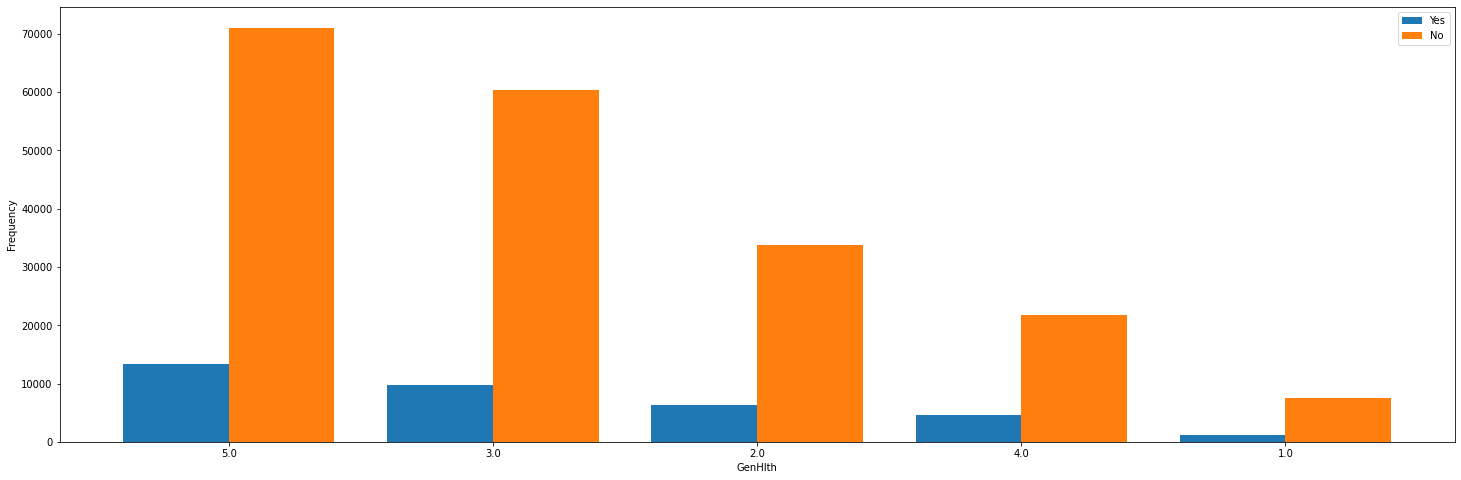

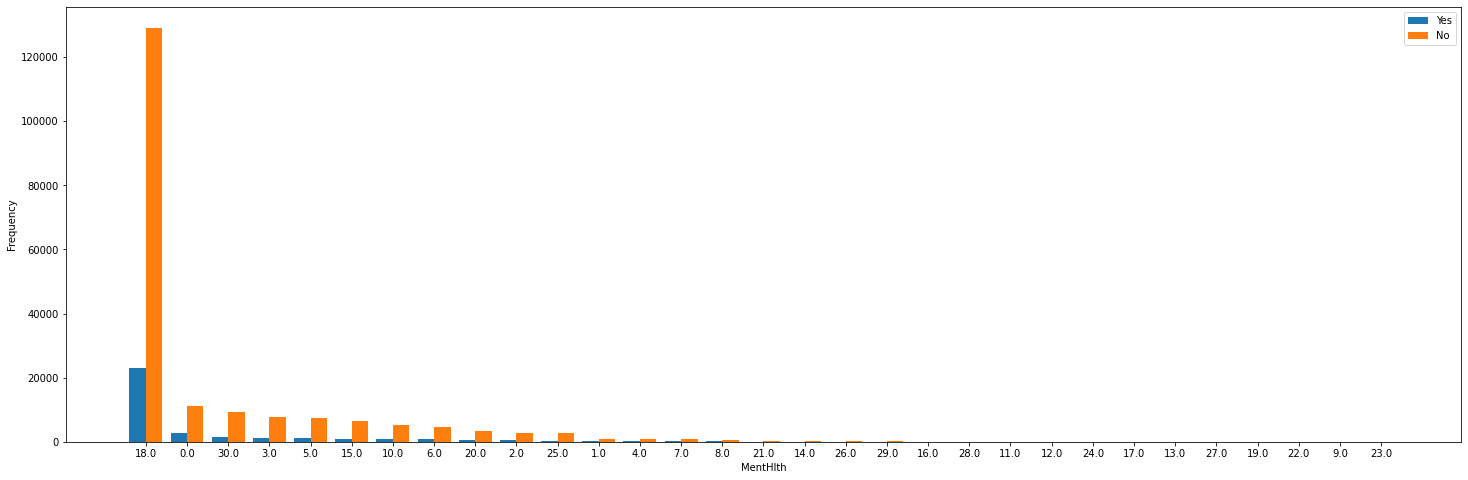

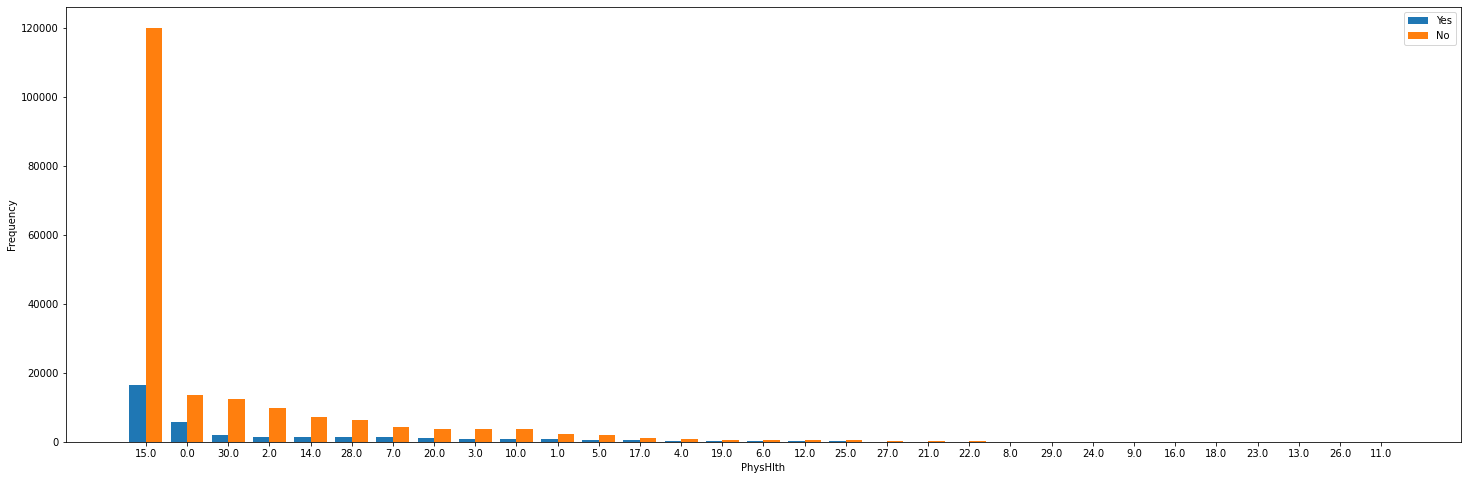

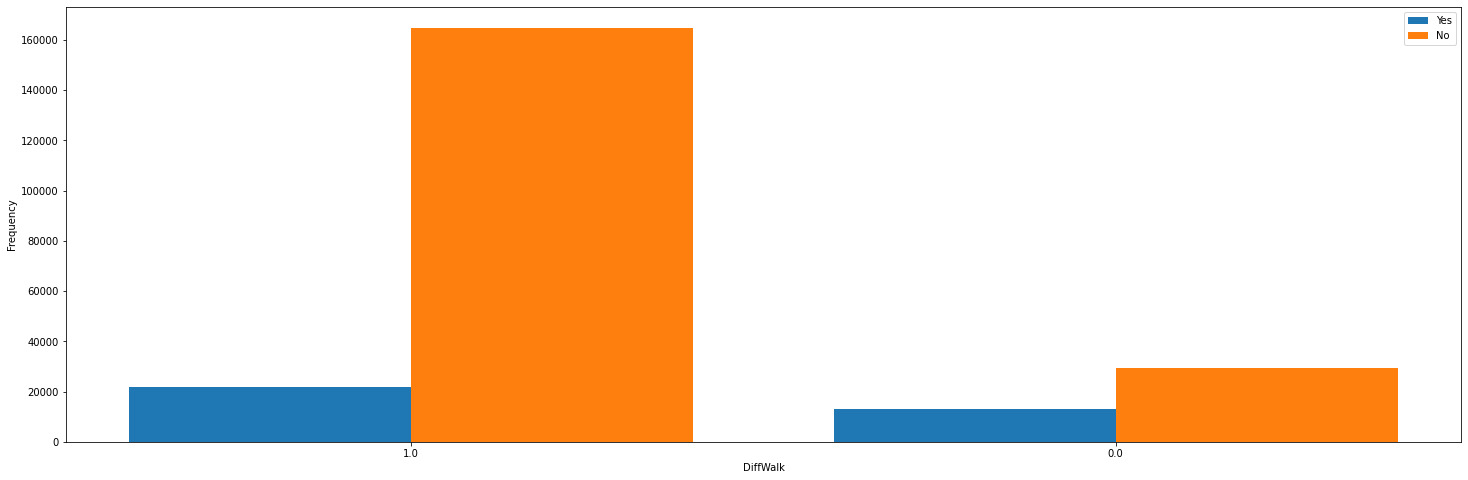

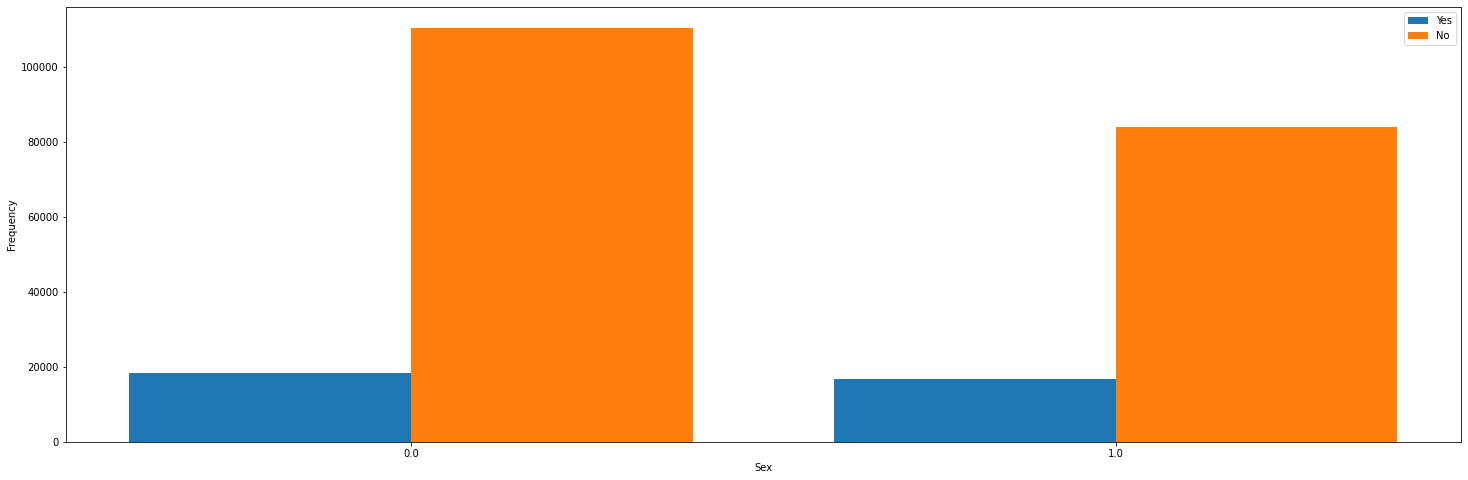

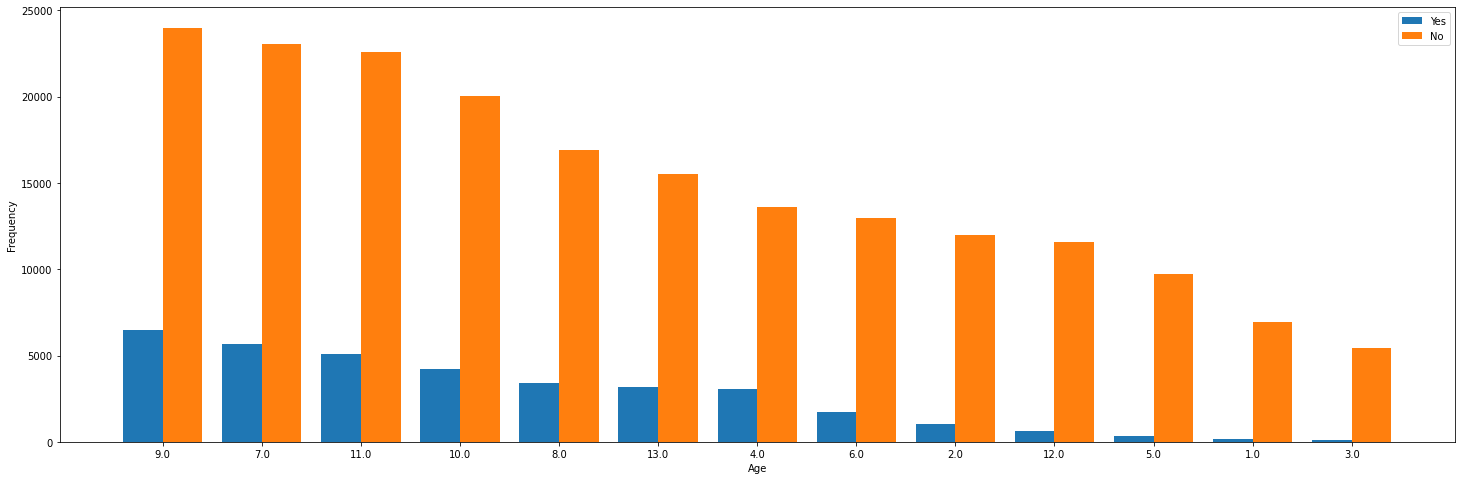

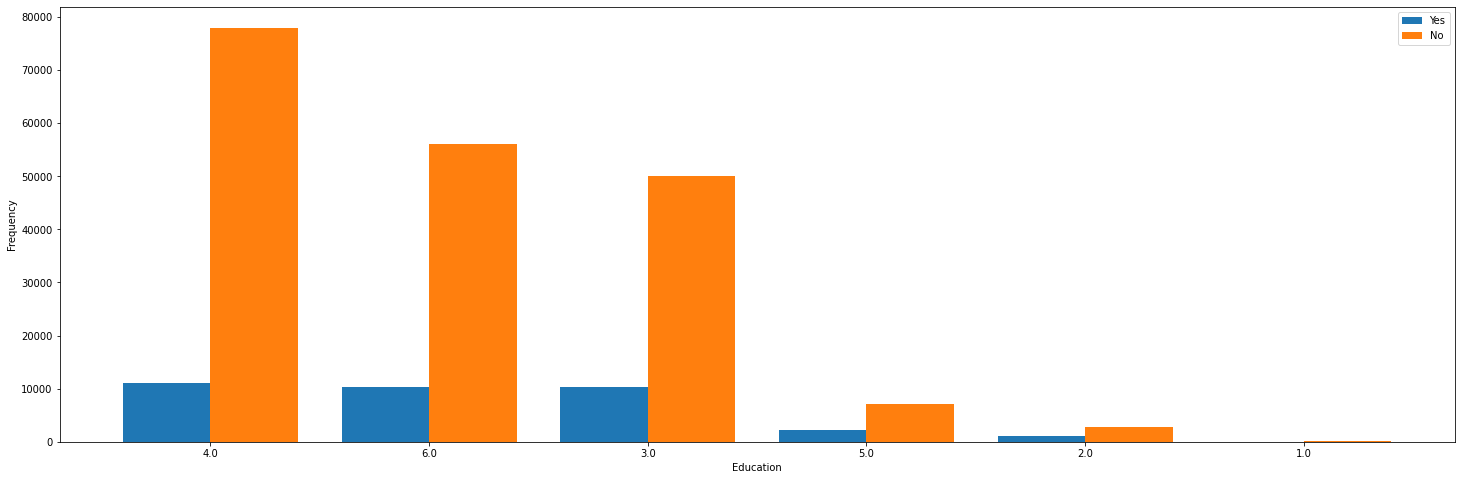

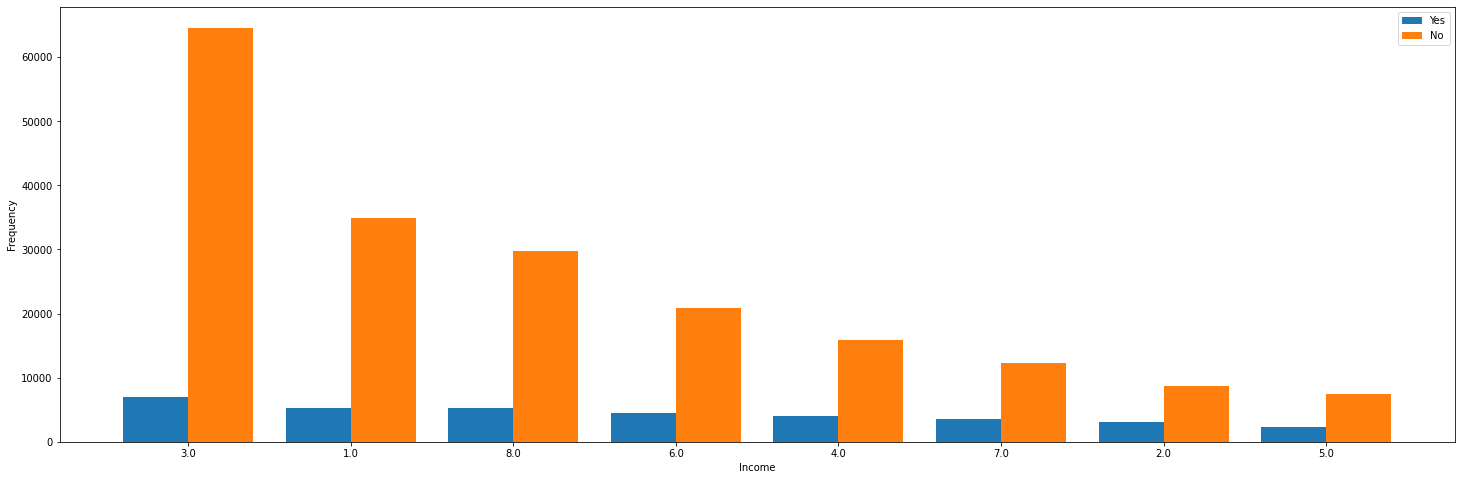

In [ ]:
diabetesX_col = list(diabetes.drop(['Diabetes_binary','BMI'], axis = 1).columns)

for i in diabetesX_col[1:]:
  fig, ax = plt.subplots(figsize=(25, 8))
  x = np.arange(len(diabetes[i].unique()))

  bar_width = 0.4
  x1 = list(diabetes.loc[diabetes['Diabetes_binary'] == 1, i].value_counts())
  x2 = list(diabetes.loc[diabetes['Diabetes_binary'] == 0, i].value_counts())

  b1 = ax.bar(x - bar_width/2, x1, width=bar_width)
  b2 = ax.bar(x + bar_width/2, x2, width=bar_width)
  plt.xticks(x, list(diabetes[i].unique()))
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.legend(['Yes','No'])

#Preprocessing

##Checking data distribution 

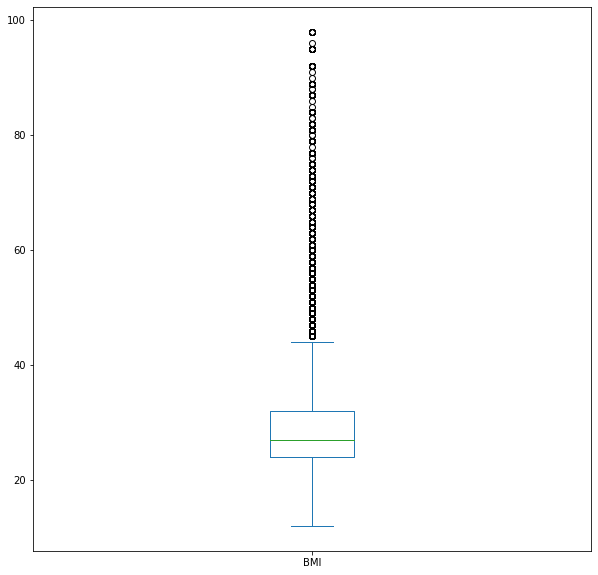

In [ ]:
diabetes[['BMI']].plot(kind="box", figsize=(10,10))

##Removing Outliers

In [ ]:
from sklearn.ensemble import IsolationForest
if1 = IsolationForest()
if1.fit(diabetes)
diabetes['Outlier'] = if1.predict(diabetes)

In [ ]:
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Outlier
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,-1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,-1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1


In [ ]:
diabetes.drop(diabetes[diabetes['Outlier'] == -1].index,inplace = True)

In [ ]:
diabetes['Outlier'].value_counts()

1    154266
Name: Outlier, dtype: int64

In [ ]:
diabetes.drop(columns=['Outlier'],inplace = True)

In [ ]:
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0


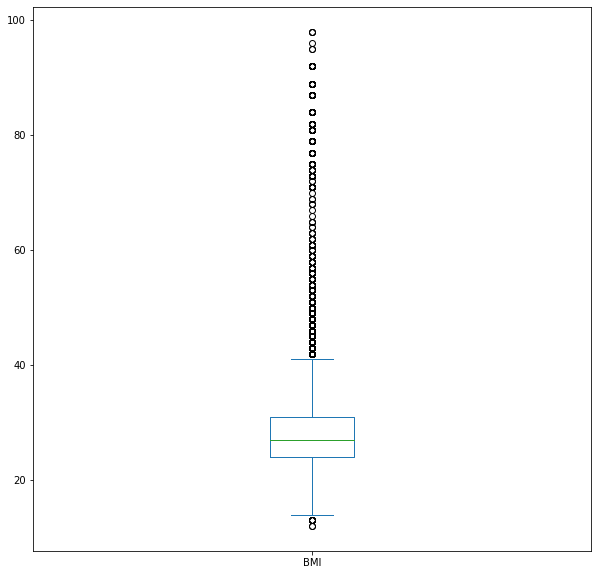

In [ ]:
diabetes[['BMI']].plot(kind="box", figsize=(10,10))

In [ ]:
diabetes.drop(diabetes[diabetes['BMI'] > 70].index,inplace = True)

In [ ]:
diabetes.shape

(153955, 22)

##Splitting the dataset and Normalizing

In [ ]:
X = diabetes.drop(columns=['Diabetes_binary'])
y = diabetes['Diabetes_binary']

In [ ]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)

scaler = StandardScaler()
temp = scaler.fit_transform(X)
X = temp

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

#Machine Learning Algorithms

##Linear Regression

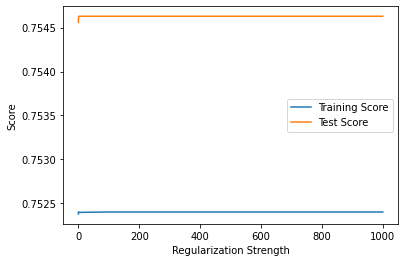

In [ ]:
classifiers = [0.01,0.1,1,100,1000]
training_scoreLR = []
test_scoreLR = []

for i in classifiers:
  log = LogisticRegression(C = i)
  log.fit(X_train, y_train)
  training_scoreLR.append(log.score(X_train, y_train))
  test_scoreLR.append(log.score(X_test, y_test))


plt.plot(classifiers, training_scoreLR, label="Training Score")
plt.plot(classifiers, test_scoreLR, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_scoreLR)} for the strenght of regularization of {classifiers[test_scoreLR.index(max(test_scoreLR))]}')

Best test score = 0.754629711049753 for the strenght of regularization of 1


In [ ]:
log = LogisticRegression(C=classifiers[test_scoreLR.index(max(test_scoreLR))])
log.fit(X_train, y_train)
print(f'Training Score: {np.round((log.score(X_train, y_train)),3)}')
print(f'TestLR Score: {np.round((log.score(X_test, y_test)),3)}')

Training Score: 0.752
TestLR Score: 0.755


##Guassian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

print(f'Training Score: {np.round((gnb.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gnb.score(X_test, y_test)),3)}')

Training Score: 0.582
Testing Score: 0.584


##Decision Tree

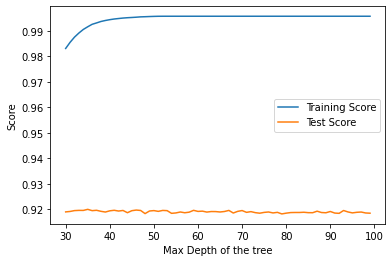

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

classifiers = [int(x) for x in range(30,100)]
training_scoreDT = []
test_scoreDT = []

for i in classifiers:
  tree = DecisionTreeClassifier(max_depth = i)
  tree.fit(X_train, y_train)
  training_scoreDT.append(tree.score(X_train, y_train))
  test_scoreDT.append(tree.score(X_test, y_test))

plt.plot(classifiers, training_scoreDT, label="Training Score")
plt.plot(classifiers, test_scoreDT, label="Test Score")
plt.xlabel('Max Depth of the tree')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_scoreDT)} for the max_depth of {classifiers[test_scoreDT.index(max(test_scoreDT))]}')

Best test score = 0.9199627160971492 for the max_depth of 35


In [ ]:
tree = DecisionTreeClassifier(max_depth=classifiers[test_scoreDT.index(max(test_scoreDT))])
tree.fit(X_train, y_train)
print(f'Training Score: {np.round((tree.score(X_train, y_train)),3)}')
print(f'Training Score: {np.round((tree.score(X_test, y_test)),3)}')

Training Score: 0.992
Training Score: 0.919


##Random Forest Classfier

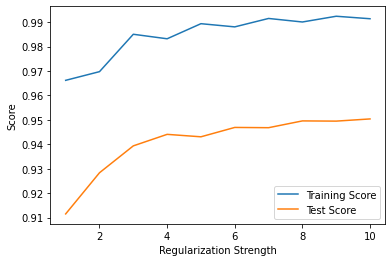

In [ ]:
training_scoreRFC = []
test_scoreRFC = []
depth = np.arange(1,11)
for i in range(1,len(depth)+1):
  forest = RandomForestClassifier(n_estimators = i)
  forest.fit(X_train,y_train)
  training_scoreRFC.append(forest.score(X_train, y_train))
  test_scoreRFC.append(forest.score(X_test, y_test))
  #print(f'Training Score: {np.round((forest.score(X_train, y_train)),3)}')
  #print(f'Testing Score: {np.round((forest.score(X_test, y_test)),3)}')

plt.plot(depth, training_scoreRFC, label="Training Score")
plt.plot(depth, test_scoreRFC, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_scoreRFC)} for the max_depth of {depth[test_scoreRFC.index(max(test_scoreRFC))]}')

Best test score = 0.9504053745097695 for the max_depth of 10


In [ ]:
forest = RandomForestClassifier(n_estimators = depth[test_scoreRFC.index(max(test_scoreRFC))])
forest.fit(X_train,y_train)

print(f'Training Score: {np.round((forest.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((forest.score(X_test, y_test)),3)}')

Training Score: 0.991
Testing Score: 0.95


##XGBoost

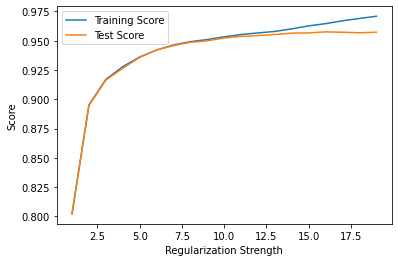

In [ ]:
training_scoreXGB = []
test_scoreXGB = []
depth = np.arange(1,20)
for i in range(1,len(depth)+1):
  gbc = XGBClassifier(max_depth=i)
  gbc.fit(X_train,y_train)
  training_scoreXGB.append(gbc.score(X_train, y_train))
  test_scoreXGB.append(gbc.score(X_test, y_test))
  # print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
  # print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

plt.plot(depth, training_scoreXGB, label="Training Score")
plt.plot(depth, test_scoreXGB, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_scoreXGB)} for the max_depth of {depth[test_scoreXGB.index(max(test_scoreXGB))]}')

Best test score = 0.9575455936406324 for the max_depth of 16


In [ ]:
gbc = XGBClassifier(max_depth=depth[test_scoreXGB.index(max(test_scoreXGB))])
gbc.fit(X_train,y_train)

print(f'Training Score: {np.round((gbc.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((gbc.score(X_test, y_test)),3)}')

Training Score: 0.965
Testing Score: 0.958


##Bagging Classifier

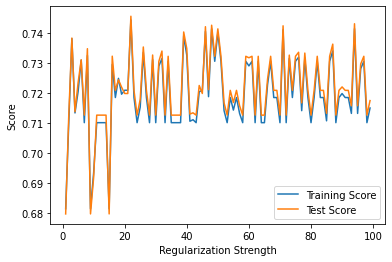

In [ ]:
from sklearn.ensemble import BaggingClassifier

training_scoreBC = []
test_scoreBC = []
depth = np.arange(1,100)
dt = DecisionTreeClassifier(max_depth = 1)
for i in range(1, len(depth)+1):
  BC = BaggingClassifier(dt,n_estimators = i, max_samples = 0.5, max_features = 0.5)
  BC.fit(X_train,y_train)
  training_scoreBC.append(BC.score(X_train, y_train))
  test_scoreBC.append(BC.score(X_test, y_test))  

plt.plot(depth, training_scoreBC, label="Training Score")
plt.plot(depth, test_scoreBC, label="Test Score")
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(f'Best test score = {max(test_scoreBC)} for the max_depth of {depth[test_scoreBC.index(max(test_scoreBC))]}')

Best test score = 0.7456604702696048 for the max_depth of 22


In [ ]:
BC = BaggingClassifier(dt,n_estimators = depth[test_scoreBC.index(max(test_scoreBC))], max_samples = 0.5, max_features = 0.5)
BC.fit(X_train,y_train)

print(f'Training Score: {np.round((BC.score(X_train, y_train)),3)}')
print(f'Testing Score: {np.round((BC.score(X_test, y_test)),3)}')

Training Score: 0.741
Testing Score: 0.742
